## Basics

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import html
import os
import requests
from urllib.parse import quote
from itertools import pairwise

from sympy import false

### Working Directory Path

In [2]:
# Google Drive Path for Running on Colab
# from google.colab import drive
# drive.mount('/content/drive')
# path = "drive/MyDrive/MSc Thesis/"

In [3]:
# Local Path for Running Locally
path = "./data/"

### Read Data

In [4]:
data = pd.read_csv(path + 'agora12_data.csv')
data

,Id,Collection,Type,Name,UserGroup,AgoraVolume,AgoraNumber,Text,PublishedNumber,Classification,...,Deposit,Dimensions,Chronology,ChronologyRange,Sort,Sibling,Edges,Bibliography,Parent,AgoraLetter
0,Agora:Object:Agora XII:1,Agora,Object,"Agora XII, no. 1",Public,12,1,Foot missing. Offset neck and echinoid mouth;...,AV 12.1,Black and Plain Pottery | Amphora | Neck-Amphora,...,Q 13:5,H. rest. 0.24; diam. 0.174.,575-550 B.C.,-575;-550,18+0000000001 Agora 0000000012:0000000001,Agora:Object:P 24986,1,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 18 k.",Agora:Image:2012.54.1450,NaN
1,Agora:Object:Agora XII:2,Agora,Object,"Agora XII, no. 2",Public,12,2,Spreading ring foot with torus outer and conve...,AV 12.2,Black and Plain Pottery | Amphora | Neck-Amphora,...,D 7:2,H. 0.292; diam. 0.285.,Late 6th c. B.C.,-525;-500,18+0000000001 Agora 0000000012:0000000002,Agora:Object:P 7266,1,NaN,Agora:Drawing:DA 6616,NaN
2,Agora:Object:Agora XII:3,Agora,Object,"Agora XII, no. 3",Public,12,3,Flaring ring foot. Torus mouth. Ridge at junct...,AV 12.3,Black and Plain Pottery | Amphora | Neck-Amphora,...,G 11:3-POU,H. 0.21; diam. 0.149.,Ca. 500 B.C.,-500,18+0000000001 Agora 0000000012:0000000003,Agora:Object:P 12781,1,NaN,NaN,NaN
3,Agora:Object:Agora XII:4,Agora,Object,"Agora XII, no. 4",Public,12,4,Ring foot. Echinoid mouth inset from neck and ...,AV 12.4,Black and Plain Pottery | Amphora | Neck-Amphora,...,U 19:2-U,H. 0.272; diam. 0.22.,Ca. 500 B.C.,-500,18+0000000001 Agora 0000000012:0000000004,Agora:Object:P 26725,1,NaN,NaN,NaN
4,Agora:Object:Agora XII:5,Agora,Object,"Agora XII, no. 5",Public,12,5,Echinus ring foot. Torus mouth; strap handles....,AV 12.5,"Bottom Fill: Late 6th c. B.C., at latest.",...,V 24:2-POU,H. 0.254; diam. 0.181.,Late 6th c. B.C.,-525;-500,18+0000000001 Agora 0000000012:0000000005,Agora:Object:P 13014,1,NaN,Agora:Image:2012.27.0009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Agora:Object:Agora XII:2036,Agora,Object,"Agora XII, no. 2036",Public,12,2036,Fragment of rim and floor with handle. Deep b...,AV 12.2036,Black and Plain Pottery | Cooking Devices | Es...,...,O 18:2,NaN,Context ca. 350-320 B.C.,-350;-320,18+0000000001 Agora 0000000012:0000002036,Agora:Object:P 13569,1,NaN,Agora:Drawing:DA 8040,NaN
1996,Agora:Object:Agora XII:2037,Agora,Object,"Agora XII, no. 2037",Public,12,2037,Handles missing. Basin and lid; handles proba...,AV 12.2037,Black and Plain Pottery | Cooking Devices | Es...,...,G 11:4,H. of basin 0.143; diam. 0.36; diam. of lid 0....,"Context, second half of 4th c. B.C.",-350;-301,18+0000000001 Agora 0000000012:0000002037,Agora:Object:P 6218,1,NaN,Agora:Image:2012.55.1261,NaN
1997,Agora:Object:Agora XII:2038,Agora,Object,"Agora XII, no. 2038",Public,12,2038,Small series. Plain flat-topped rim; flaring b...,AV 12.2038,Black and Plain Pottery | Cooking Devices | Es...,...,H 7:1,H. 0.104; diam. 0.246.,Context ca. 435-425 B.C.,-435;-425,18+0000000001 Agora 0000000012:0000002038,Agora:Object:P 4870,1,"&lt;i&gt;Hesperia,&lt;/i&gt; VI, 1937, p. 52, ...",Agora:Image:2012.25.0184,NaN
1998,Agora:Object:Agora XII:2039,Agora,Object,"Agora XII, no. 2039",Public,12,2039,"Small series. Rim flat on top, roughly moulded...",AV 12.2039,Black and Plain Pottery | Cooking Devices | Es...,...,C 12:2,NaN,Context ca. 375-325 B.C.,-375;-325,18+0000000001 Agora 0000000012:0000002039,Agora:Object:P 8304,1,NaN,Agora:Image:2012.55.1268,NaN


## Data Exploration

### Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2000 non-null   object
 1   Collection       2000 non-null   object
 2   Type             2000 non-null   object
 3   Name             2000 non-null   object
 4   UserGroup        2000 non-null   object
 5   AgoraVolume      2000 non-null   int64 
 6   AgoraNumber      2000 non-null   int64 
 7   Text             2000 non-null   object
 8   PublishedNumber  2000 non-null   object
 9   Classification   2000 non-null   object
 10  Class            2000 non-null   object
 11  Deposit          1789 non-null   object
 12  Dimensions       870 non-null    object
 13  Chronology       1994 non-null   object
 14  ChronologyRange  1990 non-null   object
 15  Sort             2000 non-null   object
 16  Sibling          2000 non-null   object
 17  Edges            2000 non-null   

### Missing Values


In [6]:
((data.isna().sum() / len(data)) * 100).round(2).astype(str) + '%'

Id                   0.0%
Collection           0.0%
Type                 0.0%
Name                 0.0%
UserGroup            0.0%
AgoraVolume          0.0%
AgoraNumber          0.0%
Text                 0.0%
PublishedNumber      0.0%
Classification       0.0%
Class                0.0%
Deposit            10.55%
Dimensions          56.5%
Chronology           0.3%
ChronologyRange      0.5%
Sort                 0.0%
Sibling              0.0%
Edges                0.0%
Bibliography       89.15%
Parent              31.7%
AgoraLetter        99.95%
dtype: object

<Axes: >

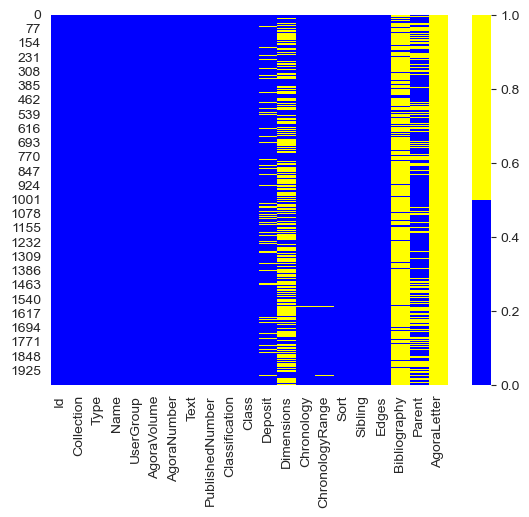

In [7]:
colours = ['blue', 'yellow']  # yellow is missing. blue is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

### Field: "Dimensions"

In [8]:
labels = {}
for entry in data["Dimensions"].dropna():
    dim = html.unescape(entry)
    dim = re.sub(r"<.*?>", "", dim)
    dim = dim.lower()
    measurements = dim.split(';')
    for measurement in measurements:
        measurement = measurement.strip().rstrip('.')
        # label = measurement.split()[:-1]
        # label = ' '.join(label)
        labelMatch = re.match(r'^(.*?)(?=\d)', measurement)
        if not labelMatch:
            continue
        label = labelMatch.group(1).strip()

        labels[label] = labels[label] + 1 if label in labels else 1
        # labels.add(label)
        # print(label)
labels = dict(sorted(labels.items(), key=lambda x: x[1], reverse=True))
labels

{'diam.': 543,
 'h.': 512,
 'h. pres.': 131,
 'diam. of rim': 69,
 'diam. est.': 55,
 'h. to rim': 39,
 'diam. of foot': 35,
 'max. dim.': 15,
 'diam. of foot est.': 13,
 'diam. of rim est.': 11,
 'diam. ca.': 7,
 'diam. at rim': 6,
 'diam. of base': 6,
 'h. of bowl': 6,
 'l. pres.': 5,
 'diam. of lid': 5,
 'diam. as restored': 4,
 'h. as restored': 4,
 'total h.': 4,
 'h. of lid': 4,
 'diam. of bowl': 4,
 'h. rest.': 3,
 'h. with lid': 3,
 'diam. rest.': 3,
 'l.': 3,
 'diam. of foot ca.': 2,
 'h. pres. to rim,': 2,
 'h. of largest fragment': 2,
 'max. diam.': 2,
 'h. pres. ca.': 2,
 'diam. of rim ca.': 2,
 'diam. est. ca.': 2,
 'diam. of bottom': 2,
 'diam. of body': 2,
 'h. with handle': 2,
 'diam. not less than': 2,
 'w.': 2,
 'diam. of rim of spout': 2,
 'h. overall': 2,
 'diam. at rim ca.': 1,
 'diam of rim, as restored': 1,
 'h. pres. of upper part ca.': 1,
 'h. ca.': 1,
 'w. of handle': 1,
 'h. pres. to rim': 1,
 'diam. of base est.': 1,
 'to top of handle': 1,
 'diam. at keel':

In [9]:
def frequencyBars(labels, fieldName, threshold=0.1):
    totalCount = data.shape[0]
    labelsFiltered = {k: v for k, v in labels.items() if round(100 * v / totalCount, 2) > threshold}
    excludedCount = len(labels) - len(labelsFiltered)

    labelsR = dict(reversed(list(labelsFiltered.items())))
    plt.figure(figsize=(10, 18))
    plt.barh(range(len(labelsR)), list(labelsR.values()))
    plt.yticks(range(len(labelsR)), list(labelsR.keys()))
    plt.yticks(fontsize=8)
    plt.xlabel('Frequency')
    plt.ylabel(fieldName)
    plt.title(f"Frequency of {fieldName}")
    for index, value in enumerate(labelsR.values()):
        plt.text(value + 2, index, f'{round(100 * value / totalCount, 2)}%', va='center', fontsize=8)  # Adjust +2 for spacing
    plt.show()

    print(f"{excludedCount} more {fieldName} with frequency <= {threshold}%")

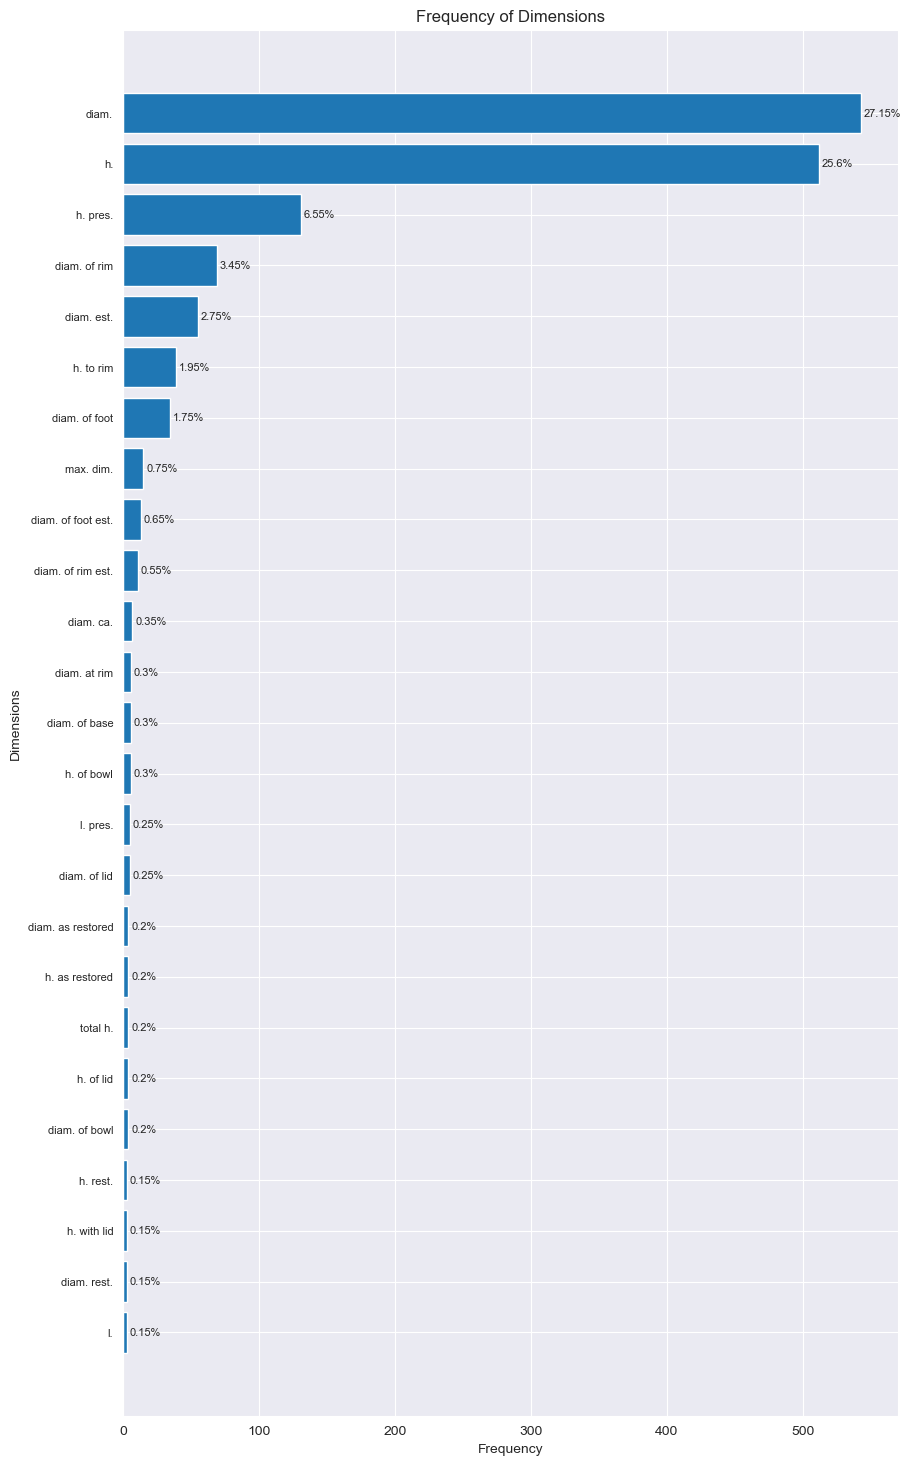

62 more Dimensions with frequency <= 0.1%


In [10]:
frequencyBars(labels, 'Dimensions')

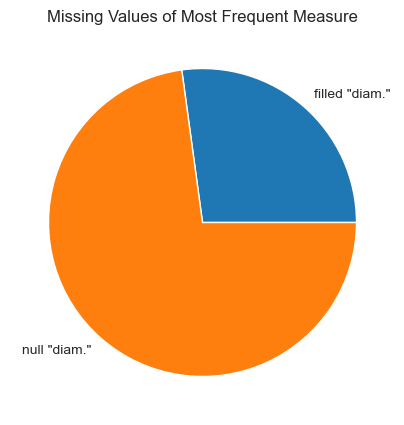

In [11]:
mostFreq = list(labels.items())[0]
perc = mostFreq[1] / data.shape[0]
plt.figure(figsize=(5, 5))
plt.pie([perc, 1 - perc], labels=[f'filled "{mostFreq[0]}"', f'null "{mostFreq[0]}"'])
plt.title('Missing Values of Most Frequent Measure')
plt.show()

### Fields: "Classification" & "Class"

In [12]:
def uniqueClassFreq(field):
    classes = dict()
    for entry in data[field].dropna():
        entry = html.unescape(entry)
        entry = re.sub(r"<.*?>", "", entry)
        entry = entry.lower()
        entryClasses = entry.split('|')
        for entryClass in entryClasses:
            entryClass = entryClass.strip()
            if not entryClass:
                continue
            classes[entryClass] = classes[entryClass] + 1 if entryClass in classes else 1
    return dict(sorted(classes.items(), key=lambda x: x[1], reverse=True))

In [13]:
classificationClasses = uniqueClassFreq('Classification')
classificationClasses

{'black and plain pottery': 1860,
 'small bowl and saltcellar': 109,
 'oinochoe': 104,
 'lekane': 100,
 'kantharos': 92,
 'jug': 83,
 'plate': 81,
 'imported': 75,
 'skyphos': 73,
 'miniature': 71,
 'saltcellar': 66,
 'lekanis': 66,
 'cup': 64,
 'stemless': 63,
 'amphora and amphoriskos': 63,
 'site': 60,
 'small': 57,
 'cup-skyphos': 56,
 'one-handler': 56,
 'bowl': 55,
 'olpe': 53,
 'plans and drawings': 53,
 'hellenistic pottery and wheelmade table ware': 52,
 'plain rim': 52,
 'lekythos': 49,
 'small bowl': 46,
 'by type': 45,
 'large': 45,
 'mug': 44,
 'askos': 41,
 'type c': 38,
 'main sequence': 38,
 'ca. 525-ca. 300 b.c.': 38,
 'black': 37,
 'mortar': 36,
 'chytra': 36,
 'attic': 35,
 'cup-kantharos': 35,
 'pyxis': 33,
 'variants': 32,
 'stemmed dish': 32,
 'delicate class': 31,
 'outturned rim': 30,
 'louterion': 30,
 'decorated basin and stand fragments': 30,
 'chous': 29,
 'shape 3': 29,
 'table amphora': 29,
 'bolsal': 28,
 'light wall': 28,
 'banded': 27,
 'fragments used 

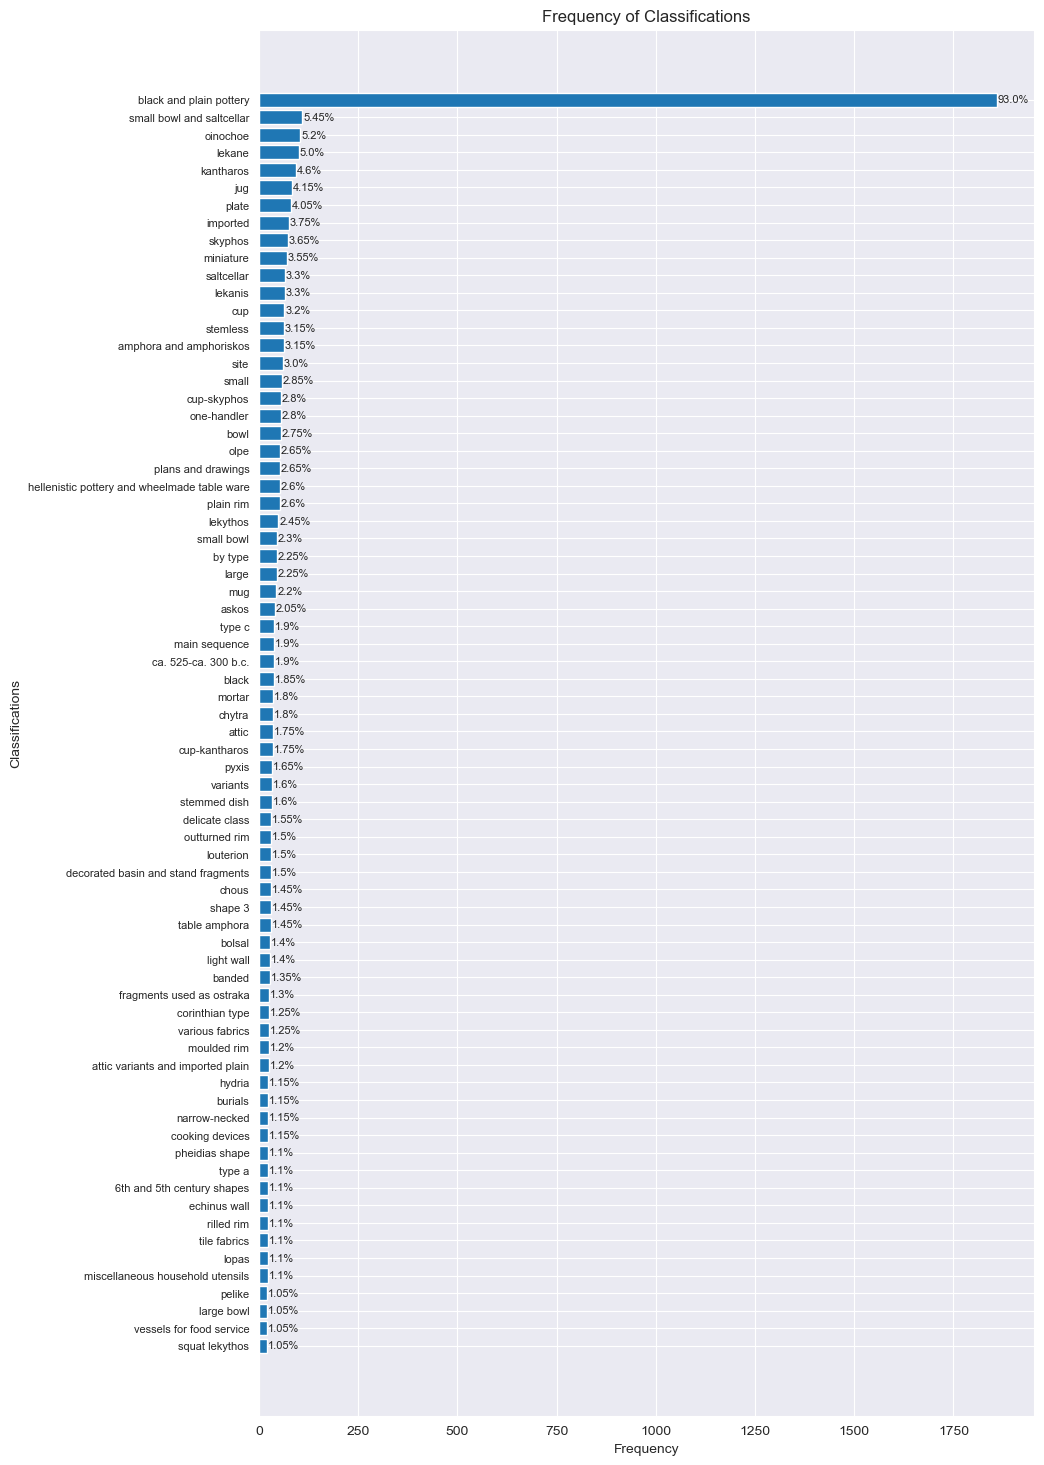

286 more Classifications with frequency <= 1%


In [14]:
frequencyBars(classificationClasses, "Classifications", 1)

In [15]:
classClasses = uniqueClassFreq('Class')
classClasses

{'black and plain pottery': 2000,
 'kantharos': 124,
 'small bowl and saltcellar': 114,
 'oinochoe': 110,
 'lekane': 105,
 'plate': 95,
 'jug': 86,
 'skyphos': 79,
 'imported': 77,
 'stemless': 72,
 'miniature': 72,
 'lekanis': 69,
 'saltcellar': 67,
 'cup': 66,
 'bowl': 66,
 'amphora and amphoriskos': 65,
 'cup-skyphos': 61,
 'one-handler': 59,
 'small': 57,
 'plain rim': 56,
 'olpe': 54,
 'lekythos': 50,
 'large': 49,
 'small bowl': 47,
 'askos': 45,
 'mug': 44,
 'black': 42,
 'main sequence': 40,
 'ca. 525-ca. 300 b.c.': 40,
 'type c': 39,
 'cup-kantharos': 39,
 'stemmed dish': 39,
 'mortar': 38,
 'chytra': 37,
 'attic': 36,
 'delicate class': 35,
 'chous': 34,
 'shape 3': 34,
 'variants': 34,
 'pyxis': 34,
 'light wall': 32,
 'outturned rim': 32,
 'bolsal': 30,
 'louterion': 30,
 'decorated basin and stand fragments': 30,
 'table amphora': 29,
 'moulded rim': 28,
 'banded': 27,
 'corinthian type': 27,
 'fragments used as ostraka': 27,
 'attic variants and imported plain': 26,
 'hyd

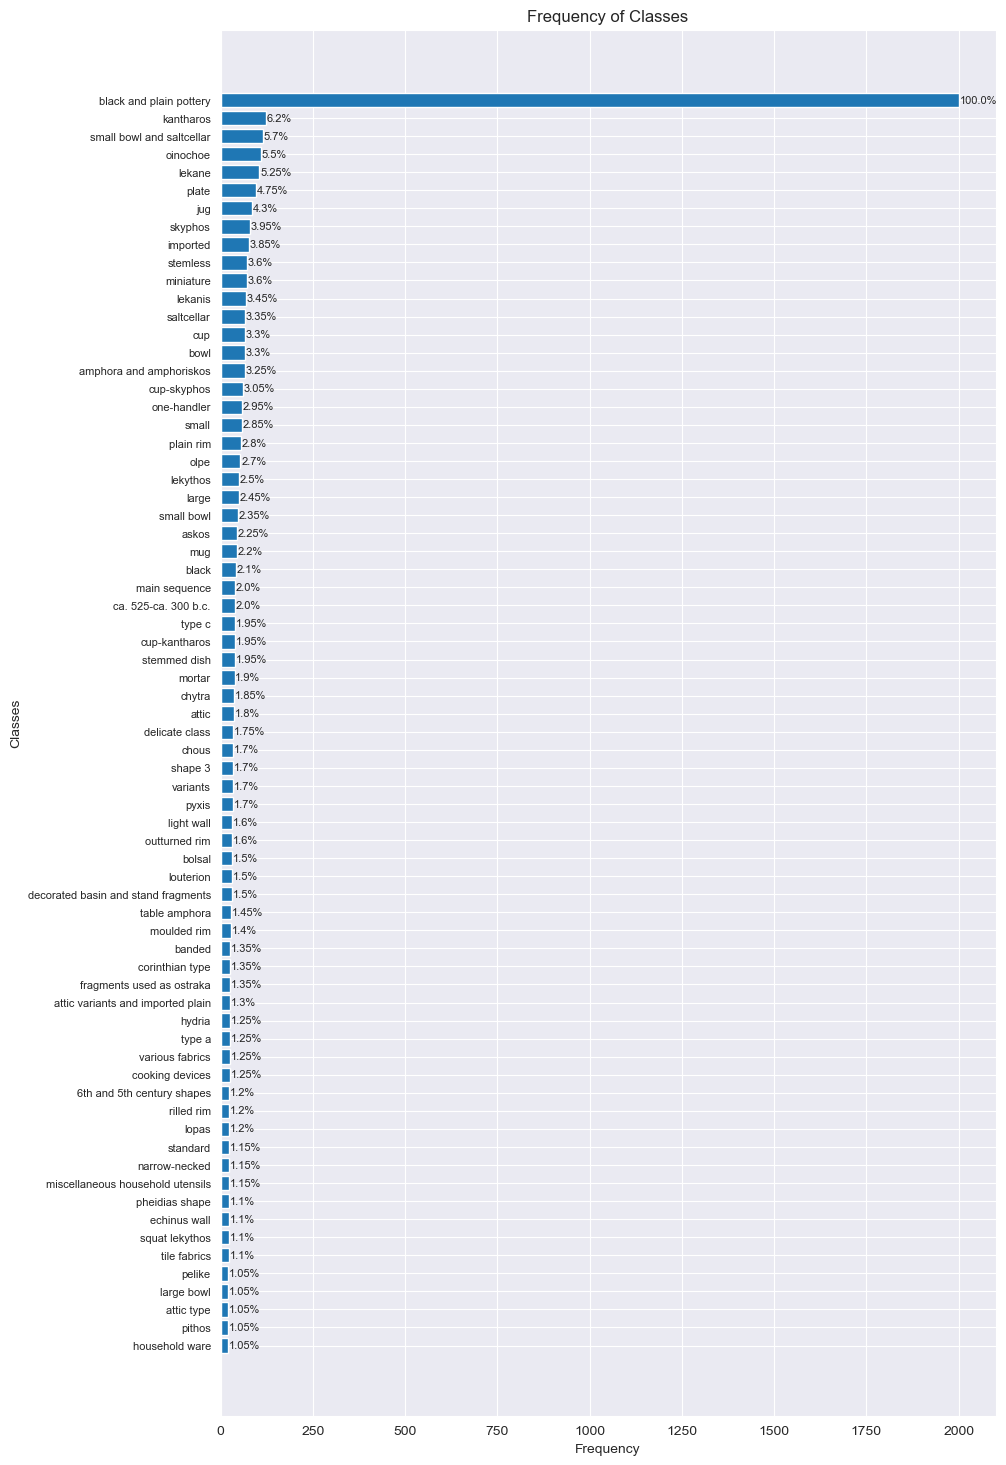

220 more Classes with frequency <= 1%


In [16]:
frequencyBars(classClasses, "Classes", 1)

### Fields: "Chronology" & "ChronologyRange"

In [17]:
data[['Chronology', 'ChronologyRange']].head()

,Chronology,ChronologyRange
0,575-550 B.C.,-575;-550
1,Late 6th c. B.C.,-525;-500
2,Ca. 500 B.C.,-500
3,Ca. 500 B.C.,-500
4,Late 6th c. B.C.,-525;-500


Instead of dropping records with missing chronology, add flag column that indicates the record's validity based on its chronology, so that for
- Chronology Prediction: records with non-valid chronology are filtered out
-  Similarity Search: all records are used (not dependent on chronology labels)

In [18]:
# data = data.dropna(subset=['ChronologyRange']).copy()

data["ValidChronology"] = True
data.loc[data["ChronologyRange"].isna(), "ValidChronology"] = False
data[['ChronologyRange', 'ValidChronology']].head()

,ChronologyRange,ValidChronology
0,-575;-550,True
1,-525;-500,True
2,-500,True
3,-500,True
4,-525;-500,True


In [19]:
valid_rows = data["ValidChronology"]

In [20]:
print(f'Initial Dataset Shape:\t\t\t{data.shape}')
print(f'Valid Chronology Dataset Shape:\t{data[valid_rows].shape}')

Initial Dataset Shape:			(2000, 22)
Valid Chronology Dataset Shape:	(1990, 22)


#### Split ChronologyRange to StartYear and EndYear Columns

Only split non-null ChronologyRange values

In [21]:
split_columns = data.loc[valid_rows, 'ChronologyRange'].str.split(';', expand=True)
split_columns

,0,1
0,-575,-550
1,-525,-500
2,-500,None
3,-500,None
4,-525,-500
...,...,...
1995,-350,-320
1996,-350,-301
1997,-435,-425
1998,-375,-325


Assign StartYear and EndYear, but only where ChronologyRange is not null

In [22]:
data.loc[split_columns.index, 'StartYear'] = split_columns[0]
data.loc[split_columns.index, 'EndYear'] = split_columns[1]

Fill EndYear with StartYear if missing (only for non-null ChronologyRange)

In [23]:
data.loc[split_columns.index, "EndYear"] = data.loc[split_columns.index, "EndYear"].fillna(data.loc[split_columns.index, "StartYear"])

Convert to numeric safely (ignore NaNs)

In [24]:
data['StartYear'] = pd.to_numeric(data['StartYear'], errors='coerce').astype('Int64')
data['EndYear'] = pd.to_numeric(data['EndYear'], errors='coerce').astype('Int64')

In [25]:
data[['ChronologyRange', 'StartYear', 'EndYear', 'ValidChronology']]

,ChronologyRange,StartYear,EndYear,ValidChronology
0,-575;-550,-575,-550,True
1,-525;-500,-525,-500,True
2,-500,-500,-500,True
3,-500,-500,-500,True
4,-525;-500,-525,-500,True
...,...,...,...,...
1995,-350;-320,-350,-320,True
1996,-350;-301,-350,-301,True
1997,-435;-425,-435,-425,True
1998,-375;-325,-375,-325,True


#### Plot Timeline

In [26]:
def plot_timeline():
    # Sort data
    data_sorted = data[data["ValidChronology"]].sort_values(by=['StartYear']).reset_index(drop=True)

    # Create year range matrix
    all_years = np.arange(data_sorted['StartYear'].min(), data_sorted['EndYear'].max() + 1)
    years_matrix = np.zeros((len(data_sorted), len(all_years)), dtype=int)

    for idx, (start, end) in enumerate(zip(data_sorted['StartYear'], data_sorted['EndYear'])):
        mask = (all_years >= start) & (all_years <= end)
        years_matrix[idx, mask] = 1

    years_df = pd.DataFrame(years_matrix, columns=all_years)

    colours = ['white', 'blue']

    sns.set_theme(rc={'figure.figsize': (26, 16)})
    sns.heatmap(years_df, cmap=sns.color_palette(colours), cbar=False, yticklabels=False)
    plt.xticks(
        range(0, len(all_years), 10),
        [f'{y}' for y in range(all_years[0], all_years[-1]+1, 10)]
    )

    # Define period boundaries
    period_boundaries = {
        "Geometric": -900,
        "Orientalizing": -700,
        "Archaic": -600,
        "Classical": -480,
        "Hellenistic": -323,
        "Roman": -31,
        "Late Roman / Byzantine": 330
    }

    # Add vertical lines for periods
    for name, year in period_boundaries.items():
        if data_sorted['StartYear'].min() <= year <= data_sorted['EndYear'].max():
            year_idx = np.where(all_years == year)[0]
            if len(year_idx) > 0:
                plt.axvline(x=year_idx[0], color='red', linestyle='--', lw=2)

    # Add text labels (period names)
    for name, year in period_boundaries.items():
        year_idx = np.where(all_years == year)[0]
        if len(year_idx) > 0:
            plt.text(year_idx[0], -10, name, rotation=90, verticalalignment='bottom', color='black', fontsize=12)


    plt.xlabel("Years")
    plt.ylabel("Pottery Records")
    plt.tight_layout()
    plt.show()

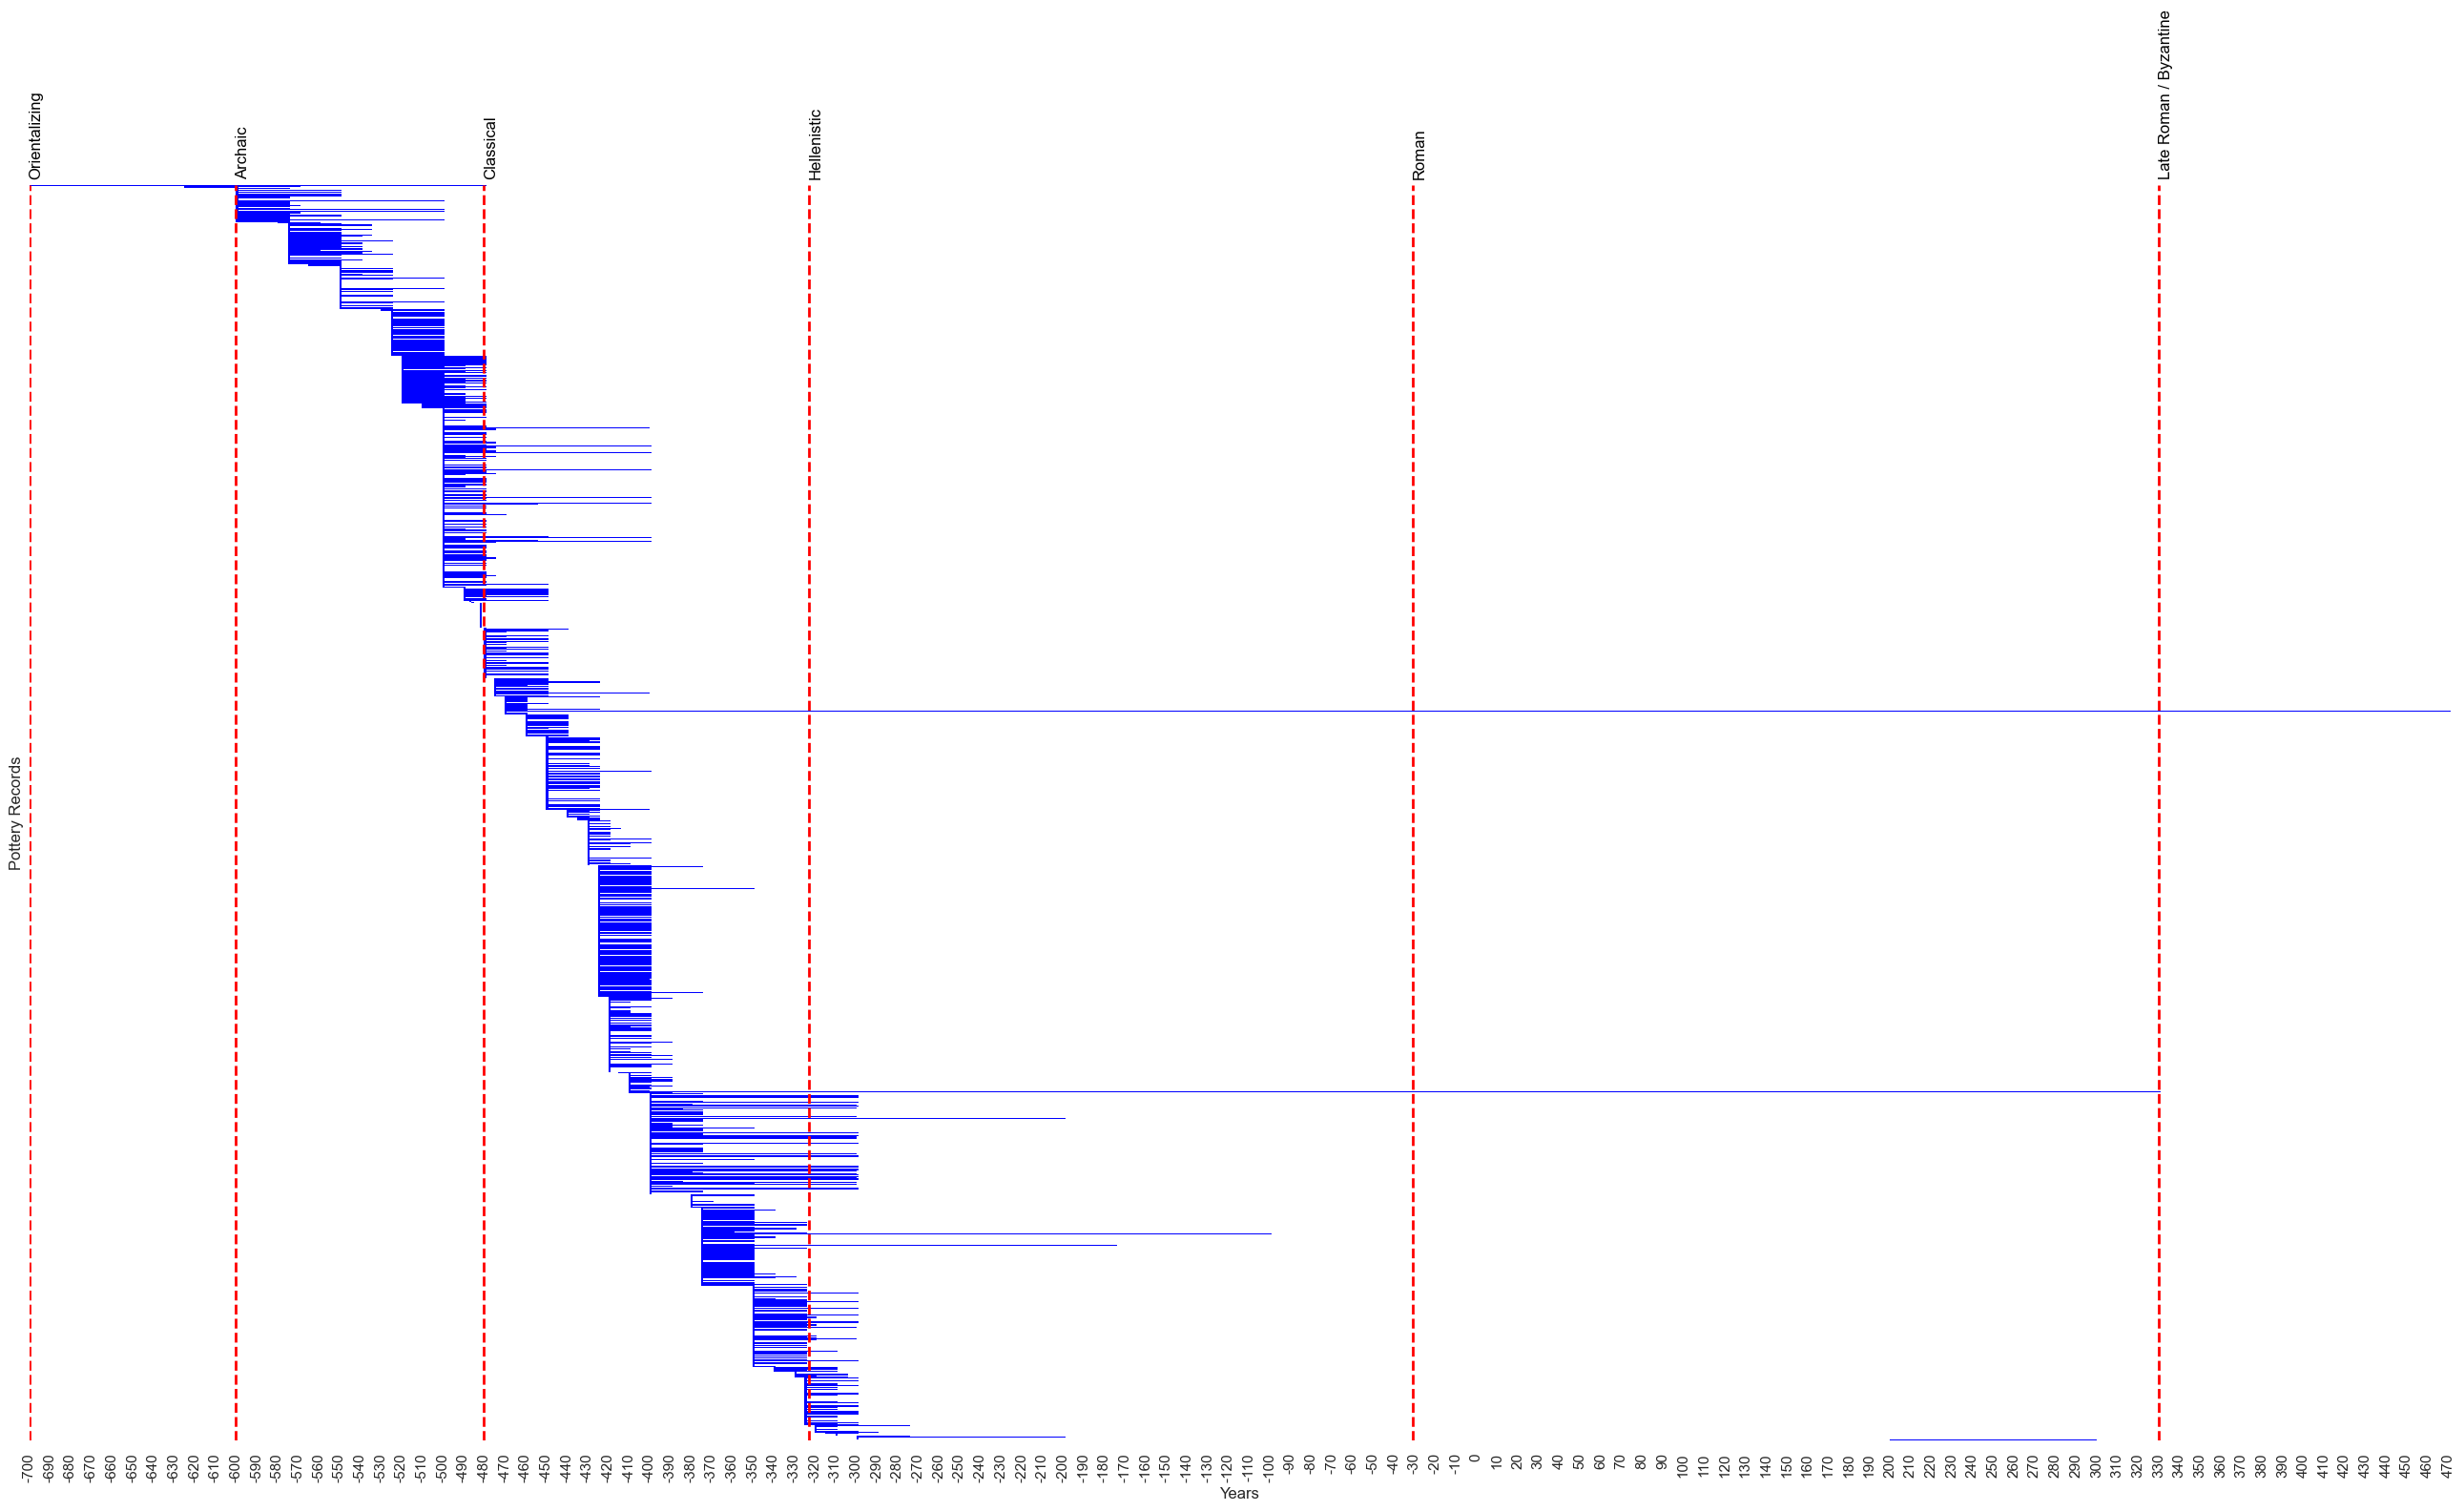

In [27]:
plot_timeline()

#### Assign Historical Periods

get all the periods that the current record's start to end year overlaps and from these decide which one to assign, by determining in which the longest range of the record's chronology falls in. for example:
1. start_year = -520 , end_year = -500 --> clearly in archaic period
2. start_year = -490 , end_year = -450 --> overlaps both archaic and classical, but has 30 years in classical and only 10 in archaic, therefore choose classical

In [28]:
# 1. Define historical periods
periods = [
    ("Geometric", -900, -700),
    ("Orientalizing", -700, -600),
    ("Archaic", -600, -480),
    ("Classical", -480, -323),
    ("Hellenistic", -323, -31),
    ("Roman", -31, 330),
    ("Late Roman / Early Byzantine", 330, 700)
]

# 2. Function to assign period based on maximum overlap
def assign_period(start_year, end_year):
    # Special case: if it's a single year (point)
    if start_year == end_year:
        for name, p_start, p_end in periods:
            if p_start <= start_year <= p_end:
                return name

    # Normal case: interval (range)
    max_overlap = 0
    best_period = ""

    for name, p_start, p_end in periods:
        # Find overlap interval
        overlap_start = max(start_year, p_start)
        overlap_end = min(end_year, p_end)

        # Calculate overlap length (if any)
        if overlap_start <= overlap_end:
            overlap = overlap_end - overlap_start
            if overlap > max_overlap:
                max_overlap = overlap
                best_period = name

    return best_period

In [29]:
data.loc[valid_rows, "HistoricalPeriod"] = data.loc[valid_rows].apply(
    lambda row: assign_period(row["StartYear"], row["EndYear"]),
    axis=1
)

In [30]:
data[["StartYear", "EndYear", "HistoricalPeriod"]].head(20)

,StartYear,EndYear,HistoricalPeriod
0,-575,-550,Archaic
1,-525,-500,Archaic
2,-500,-500,Archaic
3,-500,-500,Archaic
4,-525,-500,Archaic
5,-525,-500,Archaic
6,-525,-500,Archaic
7,-480,-450,Classical
8,-482,-482,Archaic
9,-500,-500,Archaic


In [31]:
def plot_period_distribution():
    period_order = []
    for period, _, _ in periods:
        if period in list(data.loc[valid_rows, "HistoricalPeriod"]):
            period_order.append(period)

    plt.figure(figsize=(12, 6))
    sns.countplot(data=data.loc[valid_rows], y="HistoricalPeriod", order=period_order)

    # Titles and labels
    plt.title("Distribution of Pottery Records by Historical Period", fontsize=16)
    plt.xlabel("Number of Records", fontsize=14)
    plt.ylabel("Historical Period", fontsize=14)

    for i, v in enumerate(data.loc[valid_rows, "HistoricalPeriod"].value_counts().reindex(period_order)):
        plt.text(v + 2, i, f"{round(100 * v/data.loc[valid_rows].shape[0], 2)}%", color='black', va='center', fontweight='bold')

    plt.show()

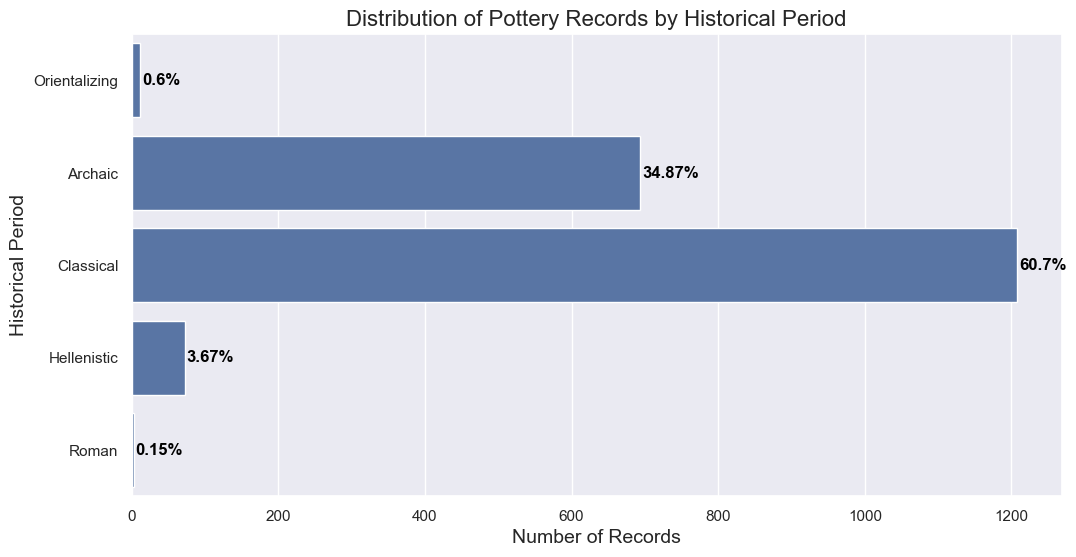

In [32]:
plot_period_distribution()

#### Midpoint Year

In [33]:
data.loc[valid_rows, "MidpointYear"] = (data.loc[valid_rows, "StartYear"] + data.loc[valid_rows, "EndYear"]) / 2
data[['StartYear', 'EndYear', 'MidpointYear']].head()

,StartYear,EndYear,MidpointYear
0,-575,-550,-562.5
1,-525,-500,-512.5
2,-500,-500,-500.0
3,-500,-500,-500.0
4,-525,-500,-512.5


#### Year Range

In [34]:
data.loc[valid_rows, "YearRange"] = data.loc[valid_rows, "EndYear"] - data.loc[valid_rows, "StartYear"]
data['YearRange'] = pd.to_numeric(data['YearRange'], errors='coerce').astype('Int64')
data[['StartYear', 'EndYear', 'YearRange']].head()

,StartYear,EndYear,YearRange
0,-575,-550,25
1,-525,-500,25
2,-500,-500,0
3,-500,-500,0
4,-525,-500,25


In [35]:
data.loc[data['YearRange'] > 50].shape[0]

80

In [36]:
test = np.sort(data.loc[valid_rows, "YearRange"].unique())
test

array([  0,   9,  10,  15,  20,  24,  25,  30,  35,  40,  45,  49,  50,
        55,  60,  74,  75,  80,  99, 100, 200, 220, 275, 740, 940])

In [37]:
def plot_year_range_distribution():
    year_ranges = data.loc[valid_rows, "YearRange"]

    bins = [-1]
    for i in range(0, 101, 10):
        bins.append(i)
        if i >= year_ranges.max():
            break
    if year_ranges.max() > 100:
        bins.append(1000)

    labels = ["0"]
    for i,j in pairwise(bins[1:]):
        labels.append(f"({i}, {j}]")

    # Create a new binned column
    year_range_bins = pd.cut(year_ranges, bins=bins, labels=labels, right=True)

    # Plot
    bin_counts = year_range_bins.value_counts().sort_index()

    plt.figure(figsize=(16, 8))
    plt.bar(bin_counts.index, bin_counts.values)
    plt.xlabel("Year Range Interval")
    plt.ylabel("Number of Records")
    plt.title("Distribution of Year Range Intervals")
    plt.grid(True)
    plt.show()


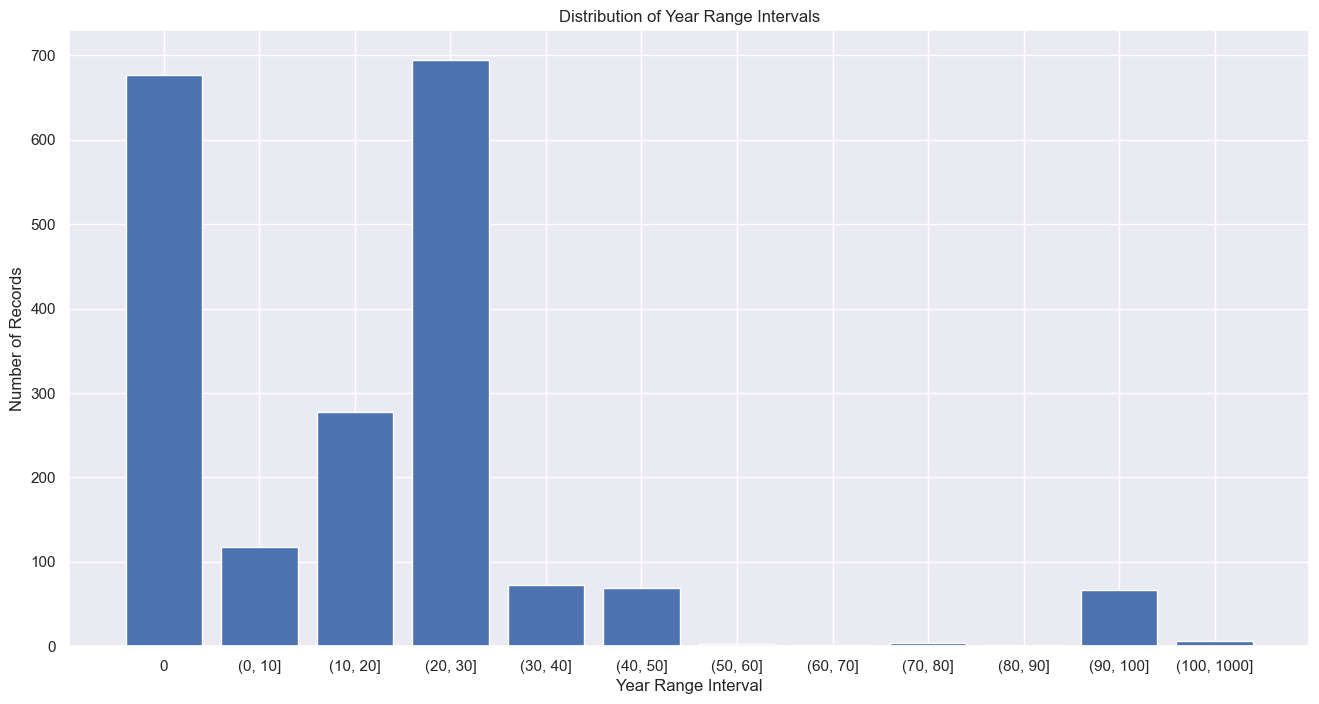

In [38]:
plot_year_range_distribution()

Refine ValidChronology flag based on YearRange

If YearRange > 50 → set ValidChronology to False

In [39]:
data["ValidChronology"] = True
data.loc[data["ChronologyRange"].isna(), "ValidChronology"] = False
data.loc[data["YearRange"] > 50, "ValidChronology"] = False

valid_rows = data["ValidChronology"]

In [40]:
data["ValidChronology"].sum()

np.int64(1910)

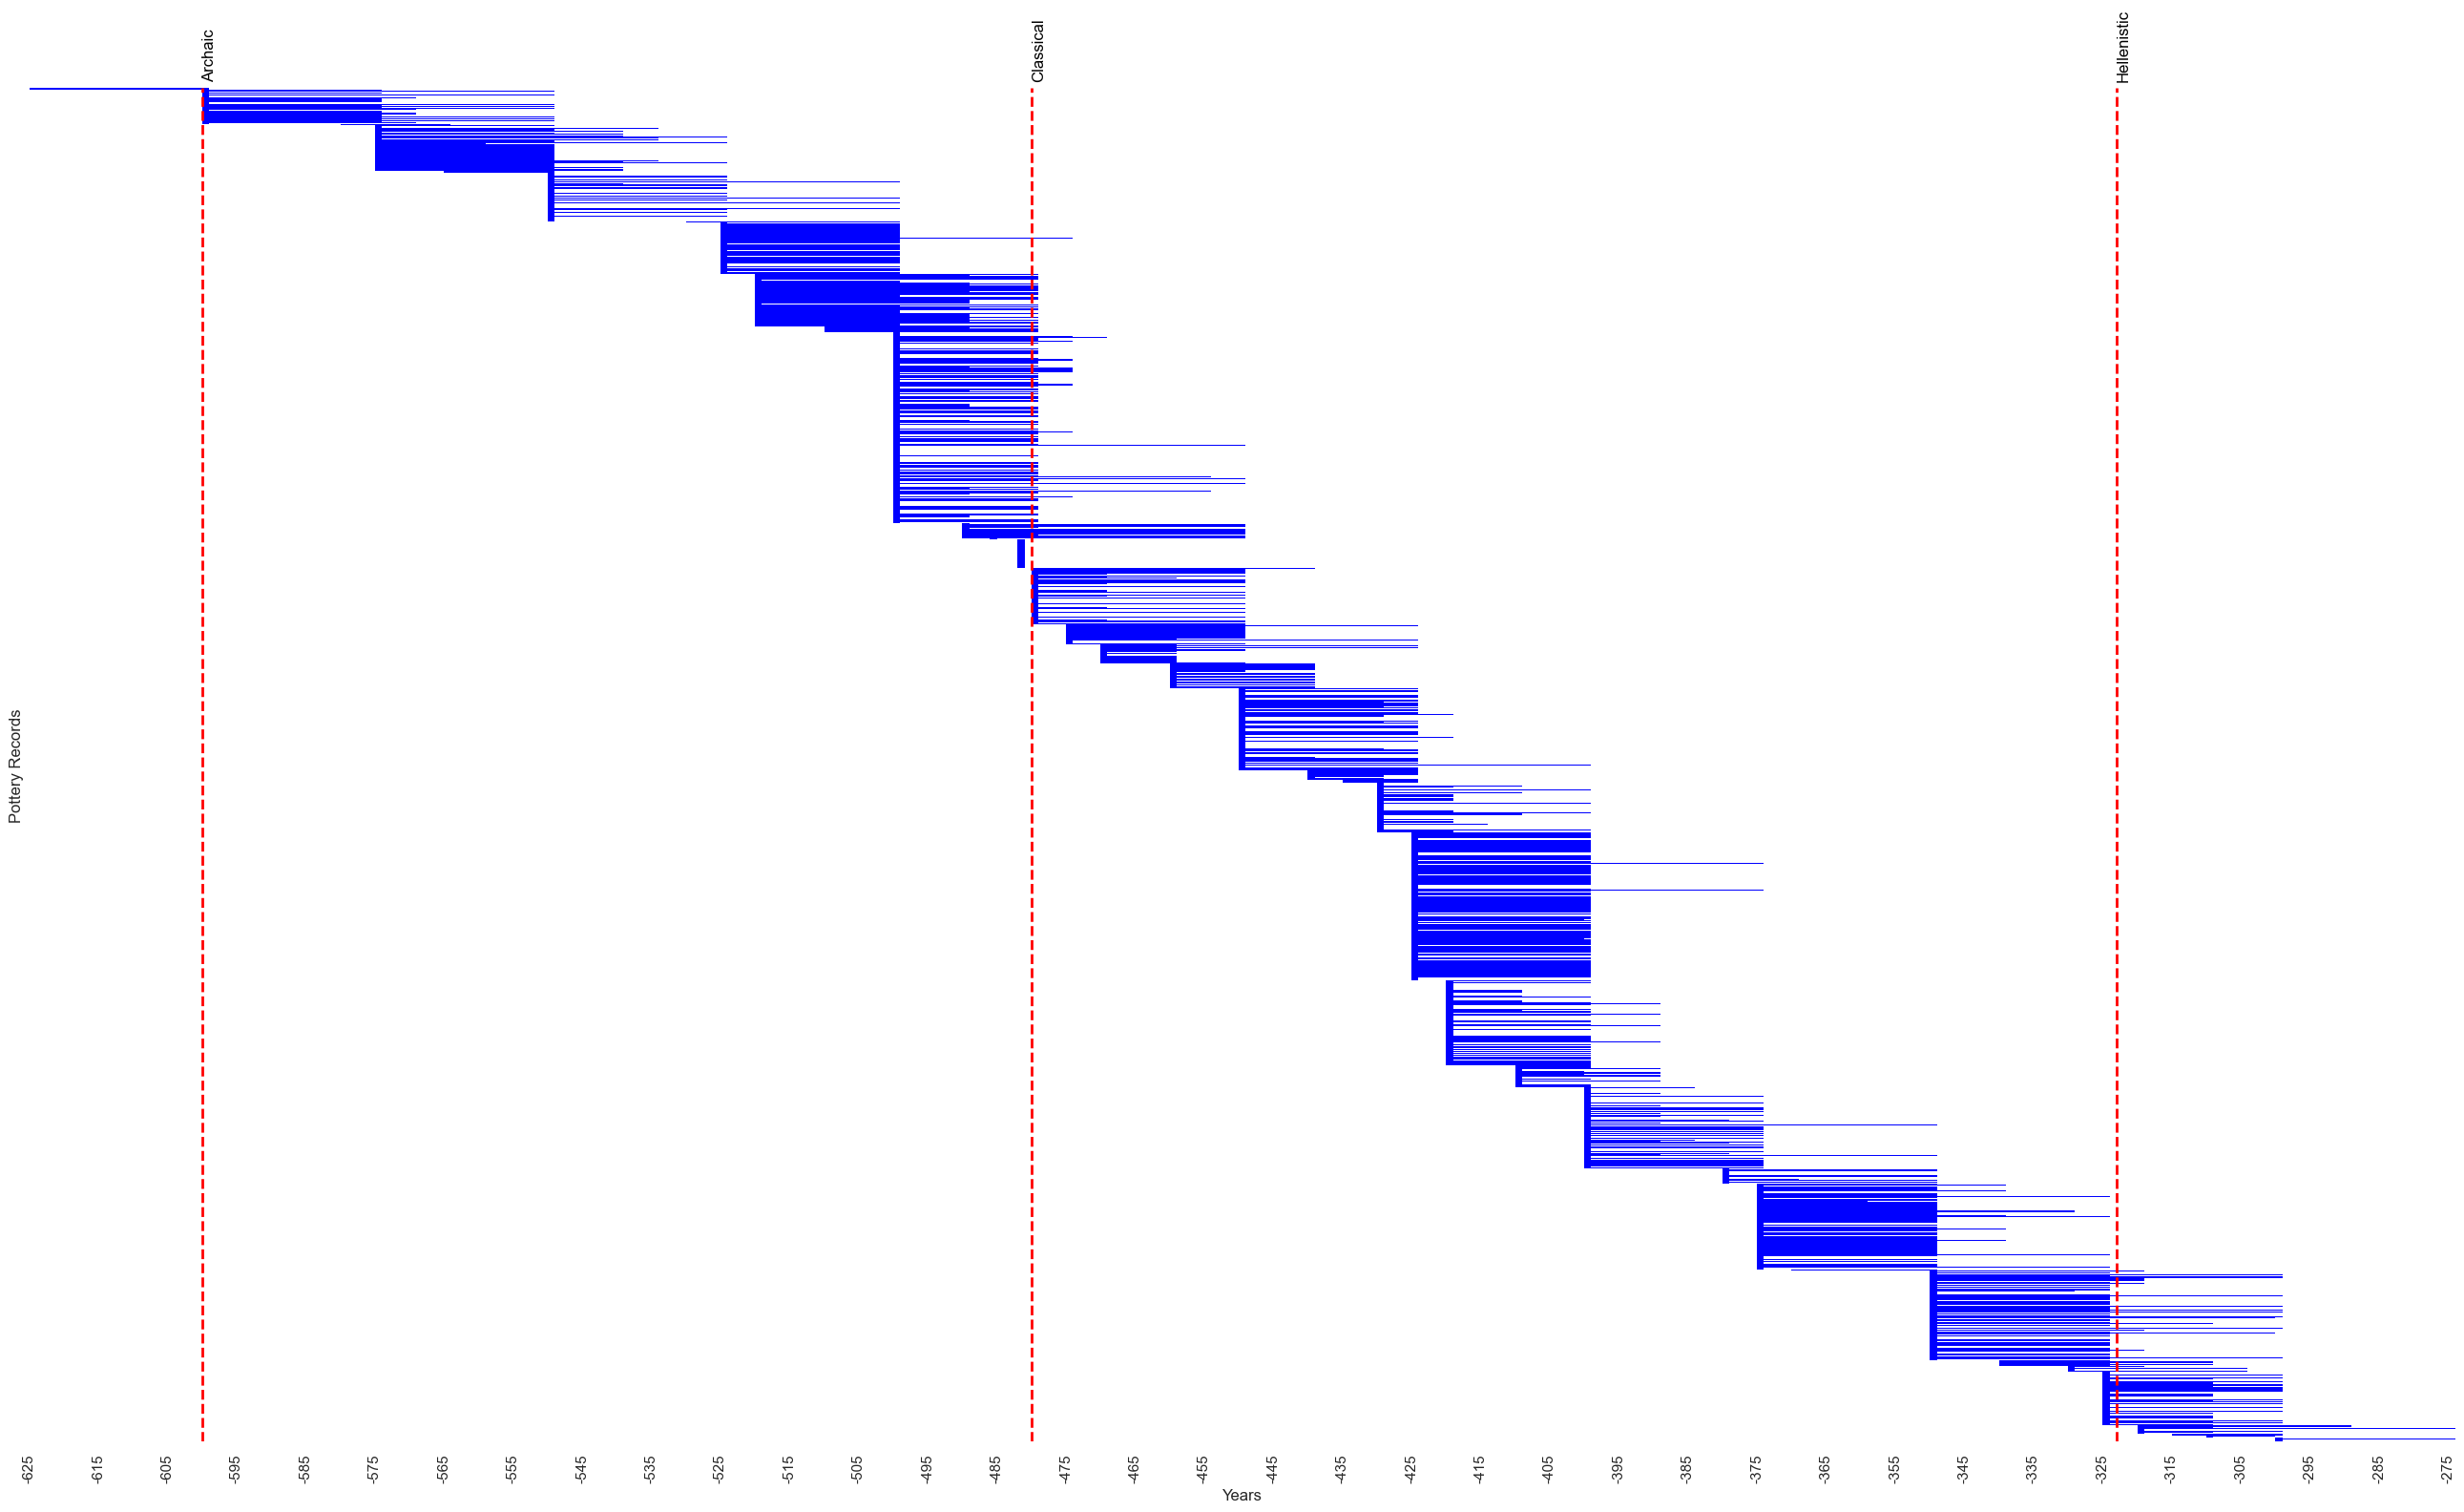

In [41]:
plot_timeline()

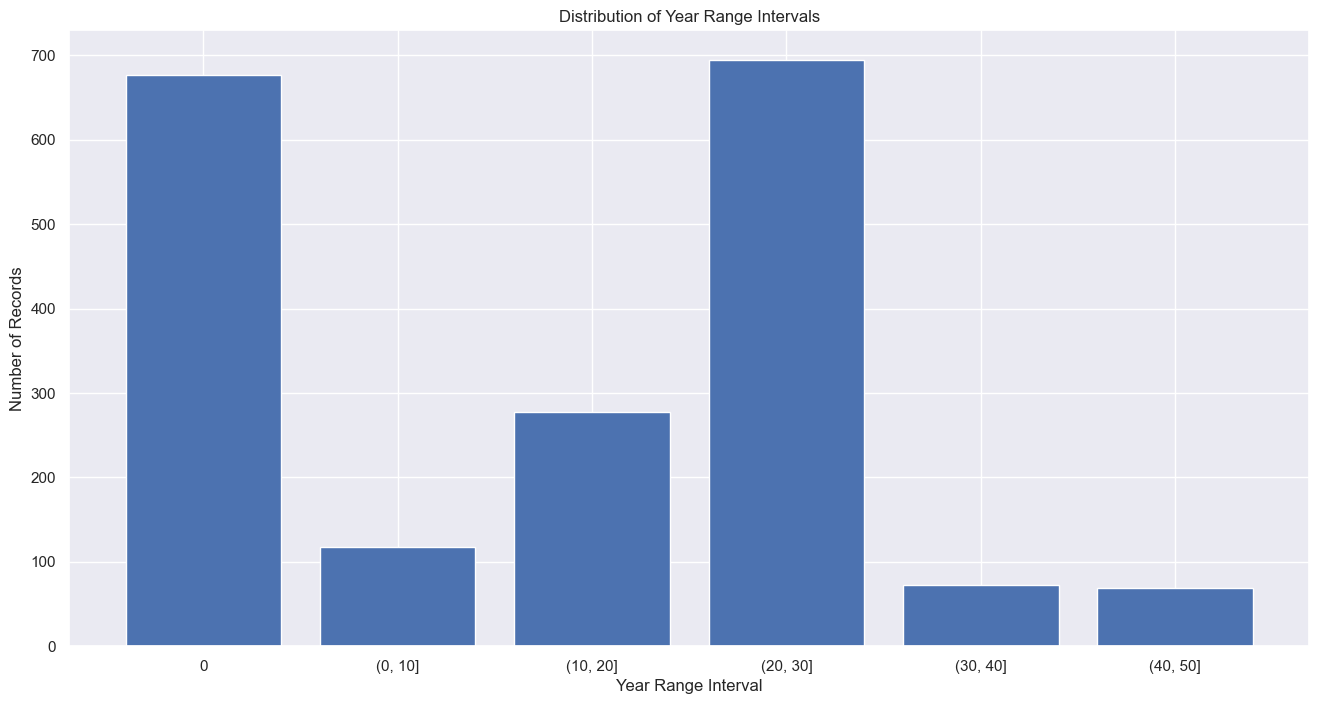

In [42]:
plot_year_range_distribution()

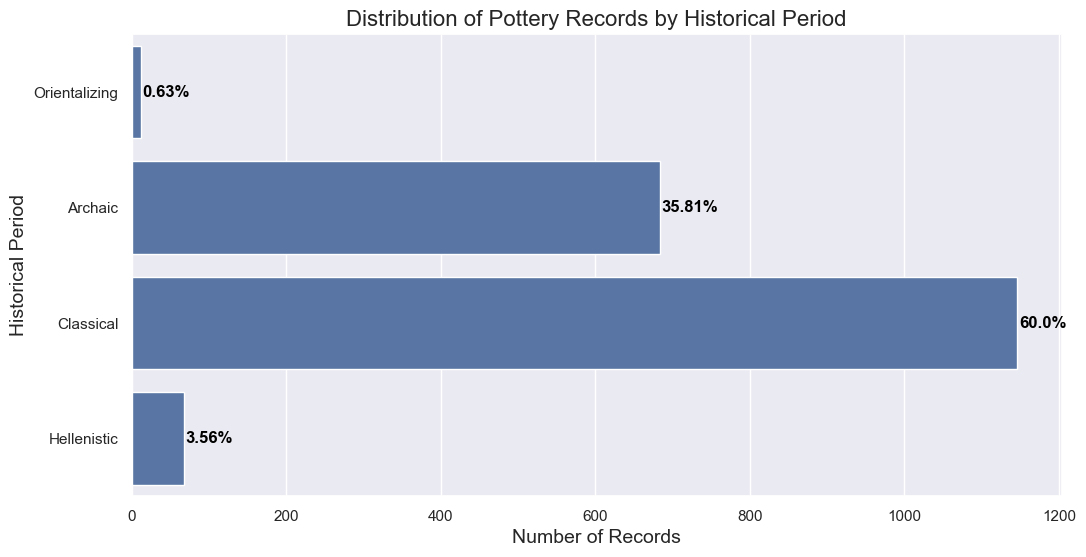

In [43]:
plot_period_distribution()

### Images

In [44]:
imageRecords = data["Parent"].str.contains("Agora:Image", na=False).sum()
print(f"Total Records with Image IDs in Parent Field:")
print(f"{imageRecords} ({(100 * imageRecords / len(data)).round(2)}% of dataset)")

Total Records with Image IDs in Parent Field:
1047 (52.35% of dataset)


#### Download Images

In [45]:
imageUrl = "https://ascsa.net/image"
imageDir = path + "images"

os.makedirs(imageDir, exist_ok=True)

In [46]:
# Function to download images
def downloadImage(imageID, imageType="full"):
    # Escape colons to match URL format
    escImageID = quote(imageID, safe='')

    # Construct the download URL
    url = f"{imageUrl}?type={imageType}&id={escImageID}"

    # Define the image's path
    imageFilename = imageID.replace(":", "_") + ".jpg"
    imagePath = os.path.join(imageDir, imageFilename)

    # Check if the file already exists and is valid
    if os.path.isfile(imagePath) and os.path.getsize(imagePath) > 0:
        print(f"✅ File exists and is valid: {imageFilename}")
        return imageFilename

    try:
        # Send HTTP request
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise error if request fails

        # Save image
        with open(imagePath, "wb") as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)

        print(f"✅ Downloaded: {imageFilename}")
        return imageFilename

    except requests.RequestException as e:
        print(f"❌ Failed to download {imageID}: {e}")
        return None

In [47]:
for index, record in data.iterrows():
    imageID = record["Parent"]

    if type(imageID) != str:
        continue
    if not imageID.startswith("Agora:Image"):
        continue

    downloadedFilename = downloadImage(imageID)

    if downloadedFilename:
        data.loc[index, "ImageFilename"] = downloadedFilename

✅ File exists and is valid: Agora_Image_2012.54.1450.jpg
✅ File exists and is valid: Agora_Image_2012.27.0009.jpg
✅ File exists and is valid: Agora_Image_2012.56.0468.jpg
✅ File exists and is valid: Agora_Image_2012.56.0468.jpg
✅ File exists and is valid: Agora_Image_2012.54.1467.jpg
✅ File exists and is valid: Agora_Image_2000.06.0201.jpg
✅ File exists and is valid: Agora_Image_2017.03.0408.jpg
✅ File exists and is valid: Agora_Image_2012.50.0871.jpg
✅ File exists and is valid: Agora_Image_2012.56.0518.jpg
✅ File exists and is valid: Agora_Image_2012.56.0518.jpg
✅ File exists and is valid: Agora_Image_2012.56.0518.jpg
✅ File exists and is valid: Agora_Image_2012.56.0467.jpg
✅ File exists and is valid: Agora_Image_2012.56.0467.jpg
✅ File exists and is valid: Agora_Image_2012.56.0467.jpg
✅ File exists and is valid: Agora_Image_2012.56.0048.jpg
✅ File exists and is valid: Agora_Image_2012.56.0048.jpg
❌ Failed to download Agora:Image:2014.01.0113: 404 Client Error: Not Found for url: http

In [48]:
data.loc[data["ImageFilename"].notna()]

,Id,Collection,Type,Name,UserGroup,AgoraVolume,AgoraNumber,Text,PublishedNumber,Classification,...,Bibliography,Parent,AgoraLetter,ValidChronology,StartYear,EndYear,HistoricalPeriod,MidpointYear,YearRange,ImageFilename
0,Agora:Object:Agora XII:1,Agora,Object,"Agora XII, no. 1",Public,12,1,Foot missing. Offset neck and echinoid mouth;...,AV 12.1,Black and Plain Pottery | Amphora | Neck-Amphora,...,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 18 k.",Agora:Image:2012.54.1450,NaN,True,-575,-550,Archaic,-562.5,25,Agora_Image_2012.54.1450.jpg
4,Agora:Object:Agora XII:5,Agora,Object,"Agora XII, no. 5",Public,12,5,Echinus ring foot. Torus mouth; strap handles....,AV 12.5,"Bottom Fill: Late 6th c. B.C., at latest.",...,NaN,Agora:Image:2012.27.0009,NaN,True,-525,-500,Archaic,-512.5,25,Agora_Image_2012.27.0009.jpg
9,Agora:Object:Agora XII:10,Agora,Object,"Agora XII, no. 10",Public,12,10,Knob only. Pomegranate knob. Groove round sta...,AV 12.10,Black and Plain Pottery | Amphora | Lid,...,NaN,Agora:Image:2012.56.0468,NaN,True,-500,-500,Archaic,-500.0,0,Agora_Image_2012.56.0468.jpg
10,Agora:Object:Agora XII:11,Agora,Object,"Agora XII, no. 11",Public,12,11,"Top of knob missing. Lid. Nearly flat on top,...",AV 12.11,Black and Plain Pottery | Amphora | Lid,...,NaN,Agora:Image:2012.56.0468,NaN,True,-480,-450,Classical,-465.0,30,Agora_Image_2012.56.0468.jpg
12,Agora:Object:Agora XII:13,Agora,Object,"Agora XII, no. 13",Public,12,13,Flaring ring foot. Torus mouth; round handles....,AV 12.13,Black and Plain Pottery | Pelike | Lidless Pelike,...,"&lt;i&gt;Hesperia,&lt;/i&gt; XXV, 1956, pl. 19 e.",Agora:Image:2012.54.1467,NaN,True,-525,-525,Archaic,-525.0,0,Agora_Image_2012.54.1467.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,Agora:Object:Agora XII:2034,Agora,Object,"Agora XII, no. 2034",Public,12,2034,Stand missing. Broad bowl with deep central c...,AV 12.2034,Black and Plain Pottery | Cooking Devices | Es...,...,NaN,Agora:Image:2012.55.1262,NaN,True,-350,-300,Classical,-325.0,50,Agora_Image_2012.55.1262.jpg
1994,Agora:Object:Agora XII:2035,Agora,Object,"Agora XII, no. 2035",Public,12,2035,Fragments from two closely similar examples; c...,AV 12.2035,Black and Plain Pottery | Cooking Devices | Es...,...,NaN,Agora:Image:2012.56.0490,NaN,True,-375,-325,Classical,-350.0,50,Agora_Image_2012.56.0490.jpg
1996,Agora:Object:Agora XII:2037,Agora,Object,"Agora XII, no. 2037",Public,12,2037,Handles missing. Basin and lid; handles proba...,AV 12.2037,Black and Plain Pottery | Cooking Devices | Es...,...,NaN,Agora:Image:2012.55.1261,NaN,True,-350,-301,Classical,-325.5,49,Agora_Image_2012.55.1261.jpg
1997,Agora:Object:Agora XII:2038,Agora,Object,"Agora XII, no. 2038",Public,12,2038,Small series. Plain flat-topped rim; flaring b...,AV 12.2038,Black and Plain Pottery | Cooking Devices | Es...,...,"&lt;i&gt;Hesperia,&lt;/i&gt; VI, 1937, p. 52, ...",Agora:Image:2012.25.0184,NaN,True,-435,-425,Classical,-430.0,10,Agora_Image_2012.25.0184.jpg


In [49]:
print(f"Records with downloaded image file: {data["ImageFilename"].notna().sum()}")
print(f"Unique downloaded image files: {data["ImageFilename"].nunique()}")

Records with downloaded image file: 954
Unique downloaded image files: 479


## Data Cleaning

- **HTML Decoding**: Converts encoded HTML entities (like `&lt;` → `<`) using `html.unescape`.
- **HTML Tag Removal**: Removes all HTML tags, such as `<i>` and `<b>`, using a regular expression.
- **Normalize Whitespace**: Ensures clean formatting by collapsing tabs, multiple spaces, and newlines.
- **Special Character Removal**: Removes symbols and characters, keeping only letters, numbers, spaces, and selected punctuation (`.,!?-;:`). Retaining punctuation may preserve context relevance.
- **Lowercasing**: Makes text consistent for textual analysis.


In [50]:
# Function to clean text data
def clean_text(text):
    # Handle missing values
    if pd.isna(text):
        return ""

    # Decode HTML entities (e.g., &lt;b&gt; -> <b>)
    text = html.unescape(text)

    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # Remove special characters (retain alphanumeric and some punctuation)
    text = re.sub(r"[^\w\s.,;:!?-]", "", text)

    # Convert to lowercase
    text = text.lower()

    # Normalize whitespace (remove line breaks, tabs, extra spaces)
    text = re.sub(r"[\r\n\t]+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [51]:
# Cleaning individual columns
# Combine into the single 'CombinedText' column:
data.loc[:, "FullText"] = (
        data["Text"].apply(clean_text) + " " +
        data["Classification"].apply(clean_text) + " " +
        data["Class"].apply(clean_text) + " " +
        data["Dimensions"].apply(clean_text)
)

In [52]:
data["FullText"]

0       foot missing. offset neck and echinoid mouth; ...
1       spreading ring foot with torus outer and conve...
2       flaring ring foot. torus mouth. ridge at junct...
3       ring foot. echinoid mouth inset from neck and ...
4       echinus ring foot. torus mouth; strap handles....
                              ...                        
1995    fragment of rim and floor with handle. deep ba...
1996    handles missing. basin and lid; handles probab...
1997    small series. plain flat-topped rim; flaring b...
1998    small series. rim flat on top, roughly moulded...
1999    stand and floor fragment. lower edge of stand ...
Name: FullText, Length: 2000, dtype: object

## Final Feature Selection

In [53]:
data.columns

Index(['Id', 'Collection', 'Type', 'Name', 'UserGroup', 'AgoraVolume',
       'AgoraNumber', 'Text', 'PublishedNumber', 'Classification', 'Class',
       'Deposit', 'Dimensions', 'Chronology', 'ChronologyRange', 'Sort',
       'Sibling', 'Edges', 'Bibliography', 'Parent', 'AgoraLetter',
       'ValidChronology', 'StartYear', 'EndYear', 'HistoricalPeriod',
       'MidpointYear', 'YearRange', 'ImageFilename', 'FullText'],
      dtype='object')

In [54]:
data_pp = data[["Id", "FullText", "ImageFilename", "StartYear", "EndYear", "MidpointYear", "YearRange",
       "HistoricalPeriod", "ValidChronology"]]
data_pp

,Id,FullText,ImageFilename,StartYear,EndYear,MidpointYear,YearRange,HistoricalPeriod,ValidChronology
0,Agora:Object:Agora XII:1,foot missing. offset neck and echinoid mouth; ...,Agora_Image_2012.54.1450.jpg,-575,-550,-562.5,25,Archaic,True
1,Agora:Object:Agora XII:2,spreading ring foot with torus outer and conve...,NaN,-525,-500,-512.5,25,Archaic,True
2,Agora:Object:Agora XII:3,flaring ring foot. torus mouth. ridge at junct...,NaN,-500,-500,-500.0,0,Archaic,True
3,Agora:Object:Agora XII:4,ring foot. echinoid mouth inset from neck and ...,NaN,-500,-500,-500.0,0,Archaic,True
4,Agora:Object:Agora XII:5,echinus ring foot. torus mouth; strap handles....,Agora_Image_2012.27.0009.jpg,-525,-500,-512.5,25,Archaic,True
...,...,...,...,...,...,...,...,...,...
1995,Agora:Object:Agora XII:2036,fragment of rim and floor with handle. deep ba...,NaN,-350,-320,-335.0,30,Classical,True
1996,Agora:Object:Agora XII:2037,handles missing. basin and lid; handles probab...,Agora_Image_2012.55.1261.jpg,-350,-301,-325.5,49,Classical,True
1997,Agora:Object:Agora XII:2038,small series. plain flat-topped rim; flaring b...,Agora_Image_2012.25.0184.jpg,-435,-425,-430.0,10,Classical,True
1998,Agora:Object:Agora XII:2039,"small series. rim flat on top, roughly moulded...",Agora_Image_2012.55.1268.jpg,-375,-325,-350.0,50,Classical,True


## Export Processed Data

In [55]:
data_pp.to_csv(path + 'agora12_data_pp.csv', index=False, encoding='utf-8', sep=',', header=True)